## Desafio

> Atenção: este notebook foi desenhado para funcionar no **Google Colab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-colab```.

Dado a imagem de um caminhão, aplique o detector de circulos baseado na transformada de Hough e conte quantas rodas ele possui e extraia a região das rodas em imagens separadas.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [ ]:
!rm -rf fiap-ml-visao-computacional/

In [ ]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório

In [ ]:
%cd fiap-ml-visao-computacional/extra/desafio-1/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

Imagem de referência do caminhão.

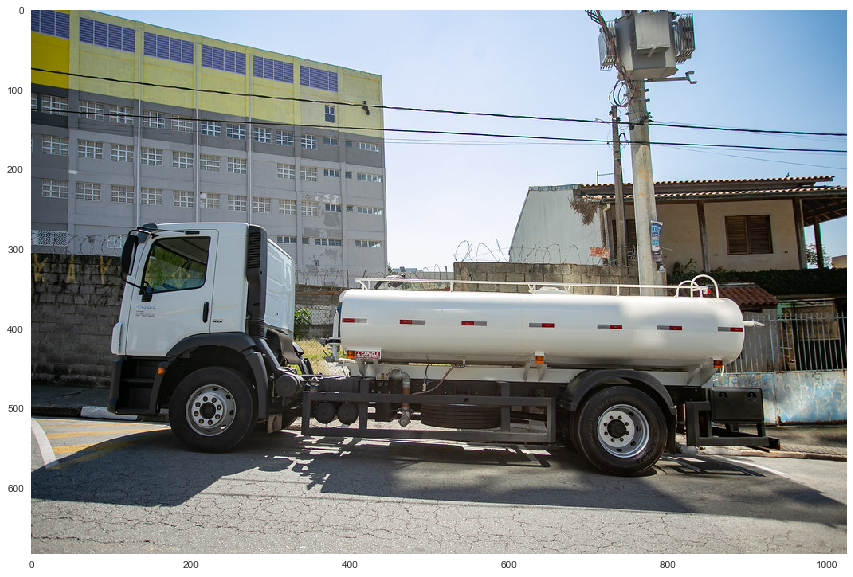

In [3]:
imagem = cv2.imread("imagens/caminhao.jpeg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)

Implementação do dector de círculos.

In [5]:
imagem_detectada = imagem.copy()

imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
circulos = cv2.HoughCircles(imagem_gray, cv2.HOUGH_GRADIENT, 1.1, 300, minRadius=30, maxRadius=100)

for idx, i in enumerate(circulos[0,:]):
    
    #Círculo em volta da moeda
    cv2.circle(imagem_detectada,(i[0], i[1]), int(i[2]), (255, 0, 0), 2) 
    #Círculo no centro da moeda
    cv2.circle(imagem_detectada, (i[0], i[1]), 2, (0, 255, 0), -1)
    roi = imagem[int(i[1])-int(i[2]):int(i[1])+int(i[2]), int(i[0])-int(i[2]):int(i[0])+int(i[2])]
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite(str(idx+1)+".png", roi)
    print("Identificado "+ str(idx+1) + " roda.")

Identificado 1 roda.
Identificado 2 roda.


Apresentação de imagem com as identificações.

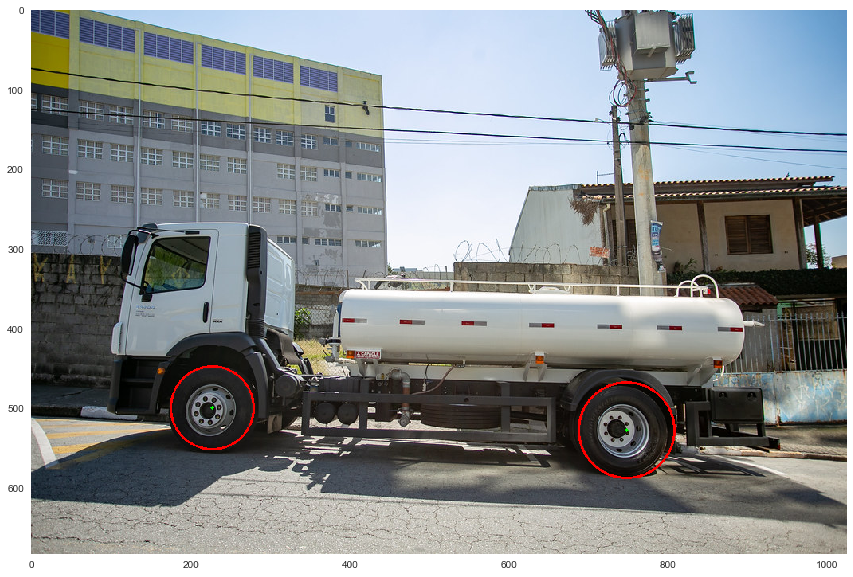

In [6]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_detectada)